In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*# Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?*

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)


*   Are there any missing values in the dataset?

*   Identify any missing values and describe how they may impact your analysis.

Here as we proceed we found following errors:

Data is non numeric.
There are some NanN values , and data was unmatched and we converted accordingly(Reviews, Price, Size , Installs)


In [6]:
df['Reviews'].str.isnumeric().sum()

10840

In [7]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
##Replacing the values
df['Reviews'] = df['Reviews'].str.replace('3.0M','3000000')

<ipython-input-8-6886a0bf092d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace('3.0M','3000000')


In [9]:
df['Reviews'] = df['Reviews'].astype('int')

In [10]:
df.drop(index=10472,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [12]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [13]:
def convert_size(size):
  if 'M' in size:
    return int(float(size.replace('M',''))*1000)
  elif 'k' in size:
    return float(size.replace('k',''))
  elif 'Varies with device' in size:
    return np.nan
  else:
    return np.nan

In [14]:
#convert size
df['Size']=df['Size'].apply(convert_size)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [16]:
df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+03, 5.50e+03, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+03, 7.00e+03, 2.30e+04, 6.00e+03, 6.10e+03,
       4.60e+03, 9.20e+03, 5.20e+03, 1.10e+04, 2.40e+04,      nan,
       9.40e+03, 1.50e+04, 1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03,
       7.90e+03, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+03, 5.70e+03, 8.60e+03, 2.40e+03, 2.70e+04, 2.50e+03,
       1.60e+04, 3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04,
       3.20e+04, 5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03,
       9.80e+03, 5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03,
       7.10e+03, 3.70e+03, 2.20e+04, 7.40e+03, 6.40e+03, 3.20e+03,
       8.20e+03, 9.90e+03, 4.90e+03, 9.50e+03, 5.00e+03, 5.90e+03,
       1.30e+04, 7.30e+04, 6.80e+03, 3.50e+03, 4.00e+03, 2.30e+03,
       7.20e+03, 2.10e+03, 4.20e+04, 7.30e+03, 9.10e+03, 5.50e

In [18]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [20]:
cols = ['Price']
chars_to_remove=['+',',','$']
for i in cols:
  for j in chars_to_remove:
    df[i] =df[i].str.replace(j,' ')

<ipython-input-20-797e3f9ccc6d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[i] =df[i].str.replace(j,' ')


In [21]:
cols = ['Installs']
chars_to_remove=['+',',','$']
for i in cols:
  for j in chars_to_remove:
    df[i] =df[i].str.replace(j,' ')

<ipython-input-21-a6b7ff92622f>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[i] =df[i].str.replace(j,' ')


In [22]:
df['Price'].unique()

array(['0', ' 4.99', ' 3.99', ' 6.99', ' 1.49', ' 2.99', ' 7.99', ' 5.99',
       ' 3.49', ' 1.99', ' 9.99', ' 7.49', ' 0.99', ' 9.00', ' 5.49',
       ' 10.00', ' 24.99', ' 11.99', ' 79.99', ' 16.99', ' 14.99',
       ' 1.00', ' 29.99', ' 12.99', ' 2.49', ' 10.99', ' 1.50', ' 19.99',
       ' 15.99', ' 33.99', ' 74.99', ' 39.99', ' 3.95', ' 4.49', ' 1.70',
       ' 8.99', ' 2.00', ' 3.88', ' 25.99', ' 399.99', ' 17.99',
       ' 400.00', ' 3.02', ' 1.76', ' 4.84', ' 4.77', ' 1.61', ' 2.50',
       ' 1.59', ' 6.49', ' 1.29', ' 5.00', ' 13.99', ' 299.99', ' 379.99',
       ' 37.99', ' 18.99', ' 389.99', ' 19.90', ' 8.49', ' 1.75',
       ' 14.00', ' 4.85', ' 46.99', ' 109.99', ' 154.99', ' 3.08',
       ' 2.59', ' 4.80', ' 1.96', ' 19.40', ' 3.90', ' 4.59', ' 15.46',
       ' 3.04', ' 4.29', ' 2.60', ' 3.28', ' 4.60', ' 28.99', ' 2.95',
       ' 2.90', ' 1.97', ' 200.00', ' 89.99', ' 2.56', ' 30.99', ' 3.61',
       ' 394.99', ' 1.26', ' 1.20', ' 1.04'], dtype=object)

In [23]:
df['Installs'].unique()

array(['10 000 ', '500 000 ', '5 000 000 ', '50 000 000 ', '100 000 ',
       '50 000 ', '1 000 000 ', '10 000 000 ', '5 000 ', '100 000 000 ',
       '1 000 000 000 ', '1 000 ', '500 000 000 ', '50 ', '100 ', '500 ',
       '10 ', '1 ', '5 ', '0 ', '0'], dtype=object)

In [24]:
#as we can see there is space and others so we couldnot convert to string and also type is object
cols = ['Installs']
chars_to_remove=[' ']
for i in cols:
  for j in chars_to_remove:
    df[i] =df[i].str.replace(j,'')

In [25]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [26]:
#now we convert install and price into respective data type
df['Installs']=df['Installs'].astype('int')
df['Price'] = df['Price'].astype('float')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [28]:
#we need numeric data as per data visualization so we convert date into day, month and year from the updated date
df['Last Updated'] =pd.to_datetime(df['Last Updated'])
df['day'] =df['Last Updated'].dt.day
df['month'] =df['Last Updated'].dt.month
df['year'] =df['Last Updated'].dt.year


In [29]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [30]:
# remove th duplicate item in a column
df.drop_duplicates(subset=['App'],keep='last',inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,26,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [31]:
df['App'].duplicated().sum()

0

What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

Text(0, 0.5, 'Rating')

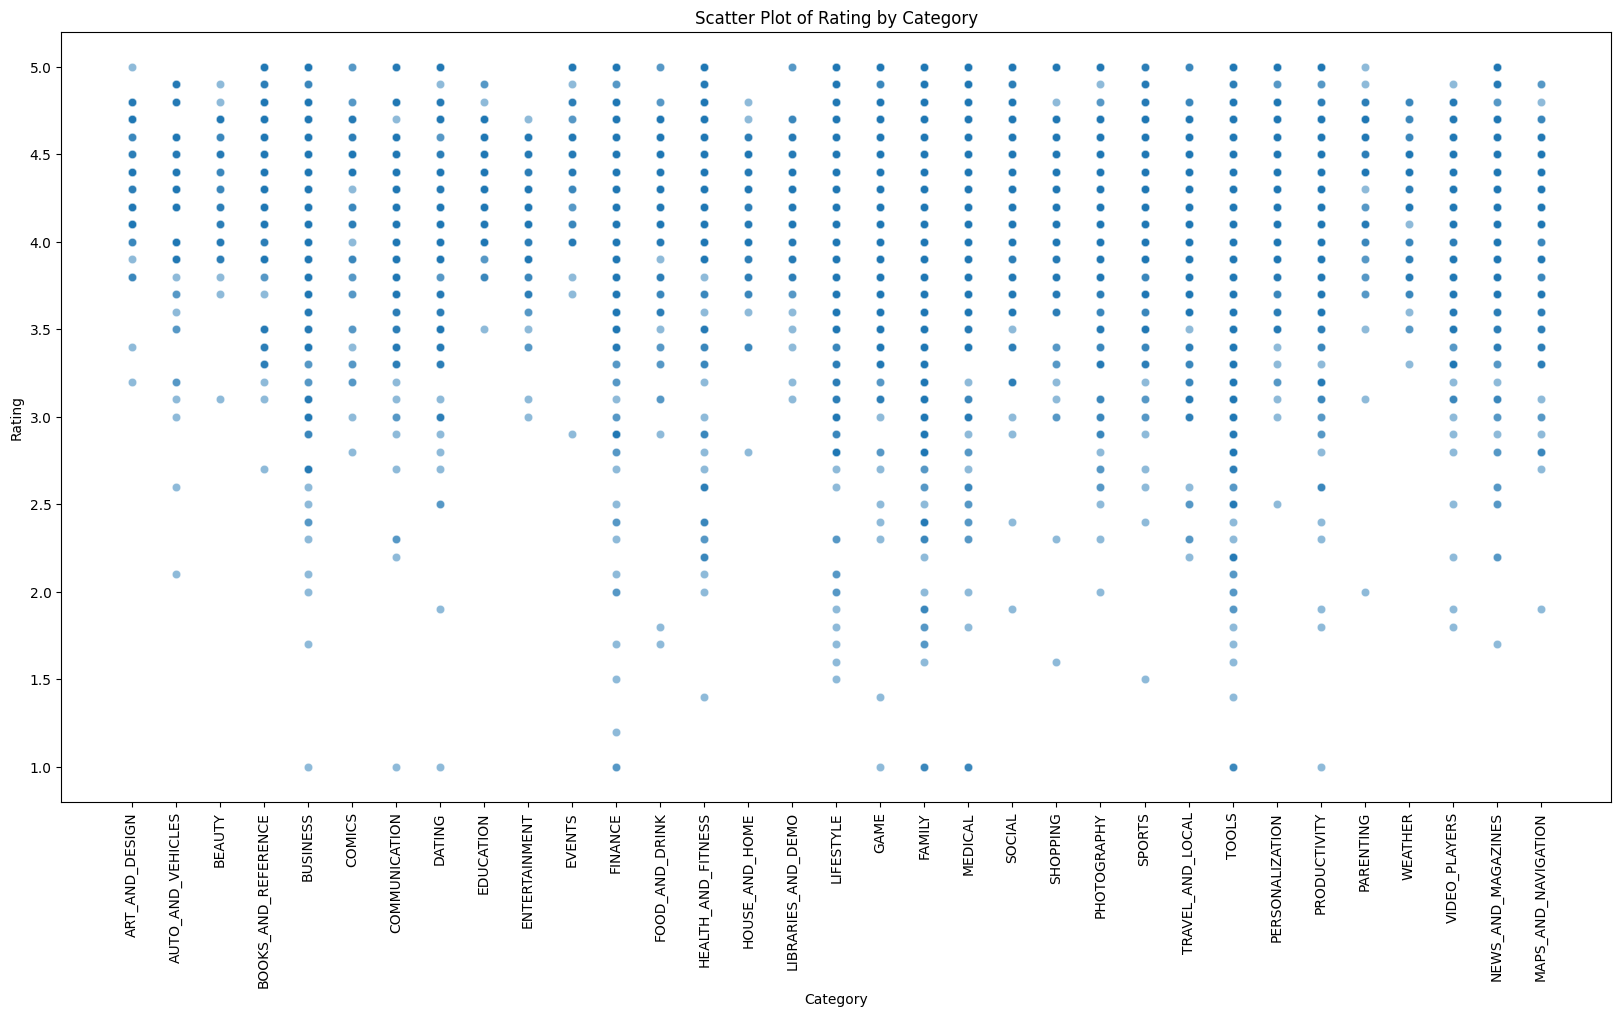

In [32]:

plt.figure(figsize=(20,10))
#sns.boxplot(x=df['Category'],y=df['Rating'])
#plt.xticks(rotation=90)
#plt.show()


sns.scatterplot(x=df['Category'], y=df['Rating'], alpha=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adding labels and title
plt.title('Scatter Plot of Rating by Category')
plt.xlabel('Category')
plt.ylabel('Rating')

## How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

<ipython-input-33-9e7e9d799a70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top10['App'], y=df_top10['Installs'], palette='Set2')


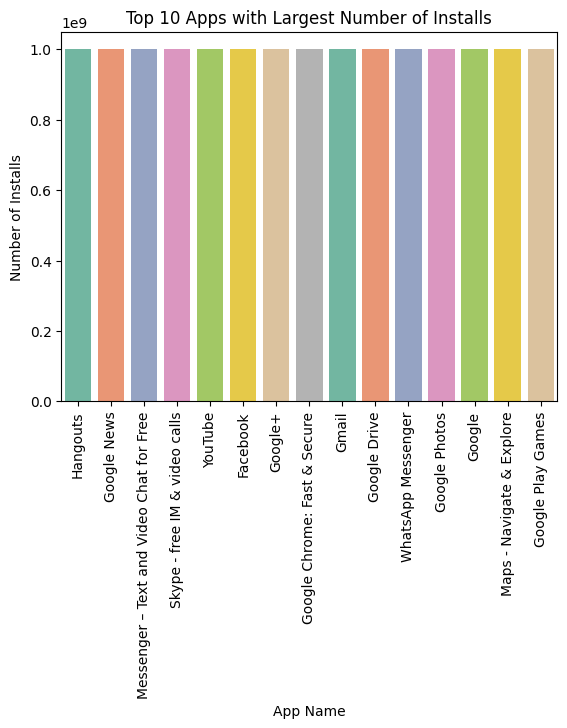

In [33]:
#Show top ten apps with largest no. of installs
df_top10 = df.sort_values(by='Installs', ascending=False).head(15)
sns.barplot(x=df_top10['App'], y=df_top10['Installs'], palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('App Name')
plt.ylabel('Number of Installs')
plt.title('Top 10 Apps with Largest Number of Installs')
plt.show()

Text(0, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

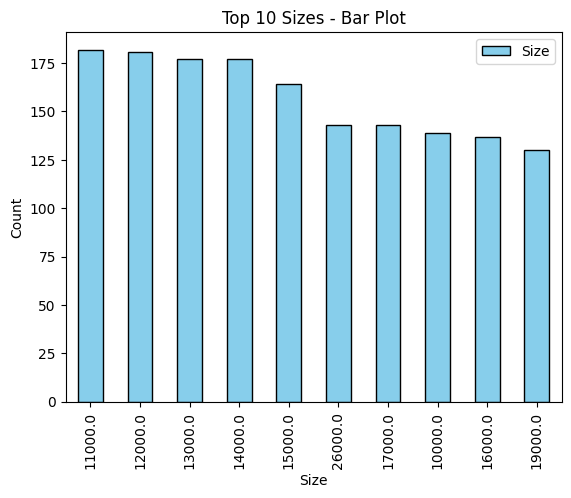

In [34]:
#top 10 apps with largest size
df_app_size = df['Size'].value_counts().sort_values(ascending=False).to_frame()


plt.figure(figsize=(12, 6))
df_app_size.head(10).plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Top 10 Sizes - Bar Plot')
plt.xlabel('Size')
plt.ylabel('Count')

## How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [35]:
df['Type'].value_counts()

Free    8904
Paid     754
Name: Type, dtype: int64

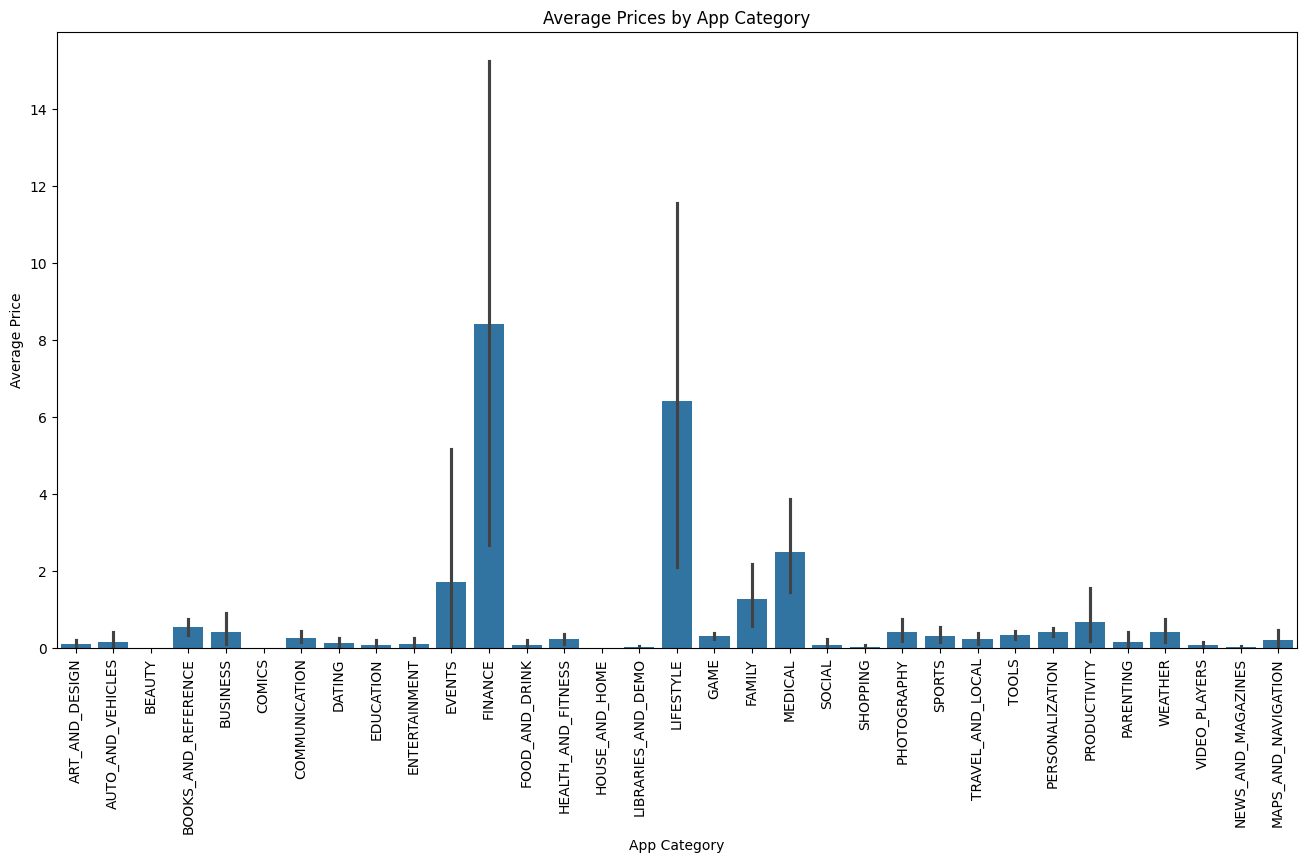

In [36]:
#since we have type as two data and category is used as type of application so we take category column
plt.figure(figsize=(16, 8))

# Create a bar chart using Seaborn
sns.barplot(x='Category', y='Price', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adding labels and title
plt.title('Average Prices by App Category')
plt.xlabel('App Category')
plt.ylabel('Average Price')

# Display the plot
plt.show()

## What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

<ipython-input-37-060886fbbbbc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top10['App'], y=df_top10['Installs'], palette='Set2')


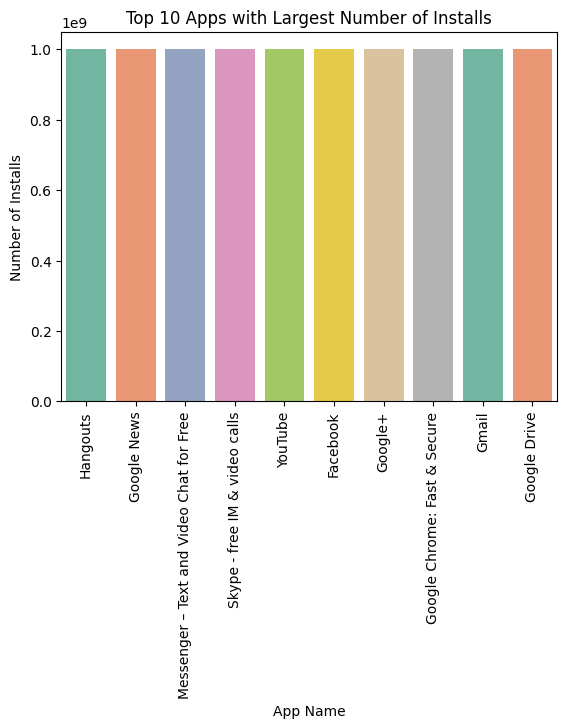

In [37]:
#Show top ten apps with largest no. of installs
df_top10 = df.sort_values(by='Installs', ascending=False).head(10)
sns.barplot(x=df_top10['App'], y=df_top10['Installs'], palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('App Name')
plt.ylabel('Number of Installs')
plt.title('Top 10 Apps with Largest Number of Installs')
plt.show()



A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?